<a href="https://colab.research.google.com/github/maleehahassan/HIDA_Into_to_DL/blob/main/10_feedforward_squirrels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [216]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow import keras
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix

sns.set_theme(style='white')

In [217]:
# %matplotlib inline

First, download a dataset about squirrel sightings in New York City.

In [218]:
# simply using pandas
url = 'https://data.cityofnewyork.us/resource/vfnx-vebw.csv?$limit=5000'
df = pd.read_csv(url)
df.shape

(3023, 31)

In [219]:
df.head()

,x,y,unique_squirrel_id,hectare,shift,date,hectare_squirrel_number,age,primary_fur_color,highlight_fur_color,...,kuks,quaas,moans,tail_flags,tail_twitches,approaches,indifferent,runs_from,other_interactions,geocoded_column
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086)
1,-73.968857,40.783783,21B-AM-1019-04,21B,AM,10192018,4,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9688574691102 40.7837825208444)
2,-73.974281,40.775534,11B-PM-1014-08,11B,PM,10142018,8,NaN,Gray,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.97428114848522 40.775533619083)
3,-73.959641,40.790313,32E-PM-1017-14,32E,PM,10172018,14,Adult,Gray,NaN,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9596413903948 40.7903128889029)
4,-73.970268,40.776213,13E-AM-1017-05,13E,AM,10172018,5,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9702676472613 40.7762126854894)


In [220]:
df.describe(include='all')

,x,y,unique_squirrel_id,hectare,shift,date,hectare_squirrel_number,age,primary_fur_color,highlight_fur_color,...,kuks,quaas,moans,tail_flags,tail_twitches,approaches,indifferent,runs_from,other_interactions,geocoded_column
count,3023.000000,3023.000000,3023,3023,3023,3.023000e+03,3023.000000,2902,2968,1937,...,3023,3023,3023,3023,3023,3023,3023,3023,240,3023
unique,NaN,NaN,3018,339,2,NaN,NaN,3,3,10,...,2,2,2,2,2,2,2,2,197,3023
top,NaN,NaN,7D-PM-1010-01,14D,PM,NaN,NaN,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,False,False,runs from (dog),POINT (-73.9561344937861 40.7940823884086)
freq,NaN,NaN,2,32,1676,NaN,NaN,2568,2473,767,...,2921,2973,3020,2868,2589,2845,1569,2345,9,1
mean,-73.967184,40.780853,NaN,NaN,NaN,1.011949e+07,4.123718,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.007726,0.010285,NaN,NaN,NaN,4.246671e+04,3.096492,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,-73.981159,40.764911,NaN,NaN,NaN,1.006202e+07,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,-73.973102,40.771676,NaN,NaN,NaN,1.008202e+07,2.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,-73.968594,40.778166,NaN,NaN,NaN,1.012202e+07,3.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,-73.960189,40.791219,NaN,NaN,NaN,1.014202e+07,6.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [221]:
# this is just extra pre-processing. It didn't work well in the end
df.above_ground_sighter = df.above_ground_sighter == 'FALSE'

## Exploratory data analysis
Inspect the dataset some more, using in particular `dtypes` or `describe`. Find out how often the different behaviours were observed!

In [222]:
# using dtypes
print(df.dtypes)

x                             float64
y                             float64
unique_squirrel_id             object
hectare                        object
shift                          object
date                            int64
hectare_squirrel_number         int64
age                            object
primary_fur_color              object
highlight_fur_color            object
combination_of_primary_and     object
color_notes                    object
location                       object
above_ground_sighter             bool
specific_location              object
running                          bool
chasing                          bool
climbing                         bool
eating                           bool
foraging                         bool
other_activities               object
kuks                             bool
quaas                            bool
moans                            bool
tail_flags                       bool
tail_twitches                    bool
approaches  

In [223]:
# using pandas describe
df.describe(include='all')

,x,y,unique_squirrel_id,hectare,shift,date,hectare_squirrel_number,age,primary_fur_color,highlight_fur_color,...,kuks,quaas,moans,tail_flags,tail_twitches,approaches,indifferent,runs_from,other_interactions,geocoded_column
count,3023.000000,3023.000000,3023,3023,3023,3.023000e+03,3023.000000,2902,2968,1937,...,3023,3023,3023,3023,3023,3023,3023,3023,240,3023
unique,NaN,NaN,3018,339,2,NaN,NaN,3,3,10,...,2,2,2,2,2,2,2,2,197,3023
top,NaN,NaN,7D-PM-1010-01,14D,PM,NaN,NaN,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,False,False,runs from (dog),POINT (-73.9561344937861 40.7940823884086)
freq,NaN,NaN,2,32,1676,NaN,NaN,2568,2473,767,...,2921,2973,3020,2868,2589,2845,1569,2345,9,1
mean,-73.967184,40.780853,NaN,NaN,NaN,1.011949e+07,4.123718,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.007726,0.010285,NaN,NaN,NaN,4.246671e+04,3.096492,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,-73.981159,40.764911,NaN,NaN,NaN,1.006202e+07,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,-73.973102,40.771676,NaN,NaN,NaN,1.008202e+07,2.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,-73.968594,40.778166,NaN,NaN,NaN,1.012202e+07,3.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,-73.960189,40.791219,NaN,NaN,NaN,1.014202e+07,6.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [224]:
df.describe()

,x,y,date,hectare_squirrel_number
count,3023.000000,3023.000000,3.023000e+03,3023.000000
mean,-73.967184,40.780853,1.011949e+07,4.123718
std,0.007726,0.010285,4.246671e+04,3.096492
min,-73.981159,40.764911,1.006202e+07,1.000000
25%,-73.973102,40.771676,1.008202e+07,2.000000
50%,-73.968594,40.778166,1.012202e+07,3.000000
75%,-73.960189,40.791219,1.014202e+07,6.000000
max,-73.949722,40.800119,1.020202e+07,23.000000


If you want, you can draw a `pairplot` – but it will be very big!

In [225]:
sns.set_theme(style='white')

Draw sighting locations using `sns.relplot` or `sns.jointplot`, then explore the distributions of a few interesting features and the `hue` parameter.

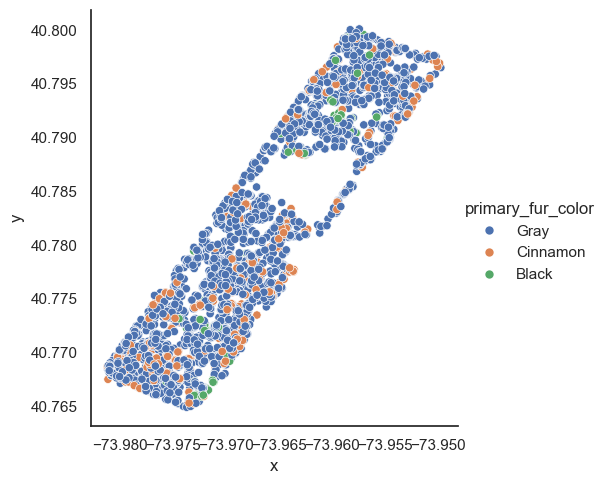

In [226]:
# the primary_fur_color is probably interesting
sns.relplot(data=df,
            x='x',
            y='y',
            hue='primary_fur_color',
            )

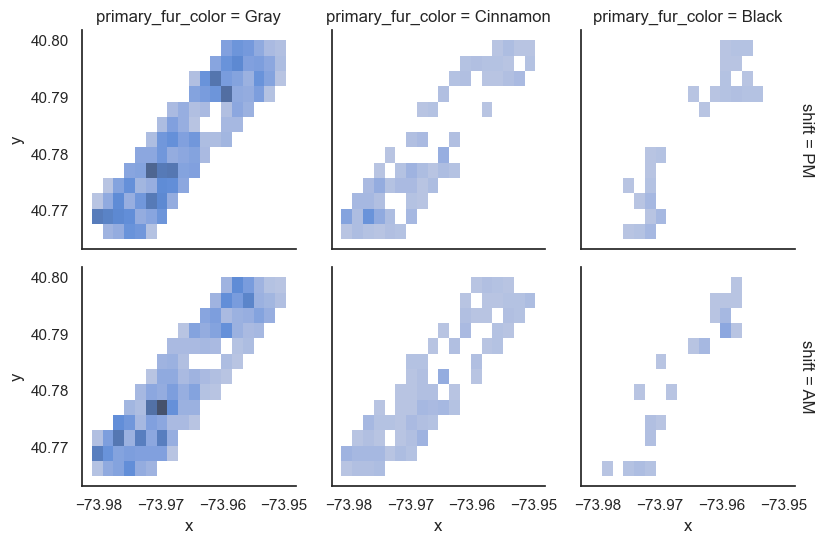

In [227]:
# here is a more complex plot that also shows the shift
f = sns.displot(data=df,
                # kind='kde',
                x='x',
                y='y',
                row='shift',
                col='primary_fur_color',
                height=2.8,
                facet_kws=dict(margin_titles=True)
                )

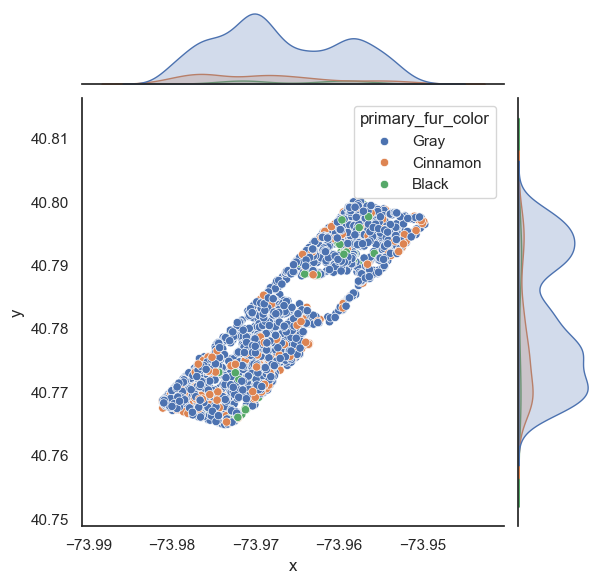

In [228]:
# a jointplot also shows the marginal distributions
sns.jointplot(data=df,
              x='x',
              y='y',
              hue='primary_fur_color',
              )

## Feature Cleaning / Encoding
This dataset definitely needs some cleaning. It has a mix of categorical, boolean and numerical values; a lot of `NA`s and some string columns with rare annotation.

In [229]:
def prepare_dataset(df: pd.DataFrame,
                    target: str = 'primary_fur_color',
                    ) -> tuple[np.array, np.array, OneHotEncoder]:
    # make a copy so we don't modify the original dataframe'
    df = df.copy()

    if target not in df.columns:
        raise ValueError(f'column {target} not found in dataset!')

    # drop rows where the target column isn't defined
    df = df.dropna(subset=[target])
    print(f'{len(df)} rows remaining')

    # not all columns can be used as training features.
    # we also treat categoricals and booleans differently.
    cat_cols = ['age', 'hectare', 'shift']
    bool_cols = [
        'running', 'chasing', 'climbing', 'eating', 'foraging',
        'kuks', 'quaas', 'moans', 'tail_flags', 'tail_twitches',
        'approaches', 'indifferent', 'runs_from', 'above_ground_sighter'
    ]

    ok_features = [c for c in [
        'hectare', 'shift', 'primary_fur_color',
        'highlight_fur_color', 'specific_location',
        'running', 'chasing', 'climbing', 'eating',
        'foraging', 'kuks', 'quaas', 'moans',
        'tail_flags', 'tail_twitches', 'approaches',
        'indifferent', 'runs_from',
    ] if c in df.columns]

    # Keep only available columns
    cat_cols = [c for c in cat_cols if c in df.columns and c != target]
    bool_cols = [c for c in bool_cols if c in df.columns and c != target]

    # fill booleans with False, then convert to int
    df[bool_cols] = df[bool_cols].fillna(False).astype(int)

    # encoder for categorical features
    preprocessor = ColumnTransformer(transformers=[
        ('bools', 'passthrough', bool_cols),
        ('cats', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ])

    # encode and transform features
    X = preprocessor.fit_transform(df)

    # encode the target column
    y_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    y = y_encoder.fit_transform(df[[target]])

    return X, y, y_encoder


In [230]:
X, y, y_encoder = prepare_dataset(df, target='primary_fur_color')  # 'primary_fur_color' 'shift', 'age'

2968 rows remaining


In [231]:
# finally make a train-test-split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.15, random_state=42, stratify=y,)

print(f'train: {X_train.shape}\ntest:  {X_test.shape}')
print('Classes:', y_encoder.categories_[0])

train: (2522, 358)
test:  (446, 358)
Classes: ['Black' 'Cinnamon' 'Gray']


### Reproducibility

In [232]:
from numpy.random import seed
from tensorflow.random import set_seed
seed(1)
set_seed(2)

## Predict Squirrel Fur Color

In [233]:
# this function sets up the model. You can make it as complex or simple as you want. In particular, feel free to try dropout, or try different sizes.
def make_multiclass_model(input_shape, n_classes) -> keras.Model:
    inputs = keras.Input(shape=input_shape)
    dense1 = keras.layers.Dense(32, activation='relu')(inputs)
    dense1 = keras.layers.Dropout(.1)(dense1)
    dense2 = keras.layers.Dense(16, activation='relu')(dense1)
    outputs = keras.layers.Dense(n_classes, activation='softmax')(dense2)
    return keras.Model(inputs=inputs, outputs=outputs)

# once your function is finished, you can build your model:
model = make_multiclass_model((X_train.shape[1],), y_train.shape[1])
# now compile it with the correct loss and optimizer:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'],
              )
model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 358)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 32)             │        11,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,067 (47.14 KB)

 Trainable params: 12,067 (47.14 KB)

 Non-trainable params: 0 (0.00 B)

In [234]:
# train the model
history = model.fit(X_train, y_train,
                    batch_size=16,
                    epochs=100,
                    validation_split=.2,
                    verbose=2)

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

Epoch 1/100
127/127 - 2s - 15ms/step - accuracy: 0.8324 - loss: 0.6406 - val_accuracy: 0.8337 - val_loss: 0.5290
Epoch 2/100
127/127 - 0s - 2ms/step - accuracy: 0.8329 - loss: 0.5331 - val_accuracy: 0.8337 - val_loss: 0.5167
Epoch 3/100
127/127 - 0s - 1ms/step - accuracy: 0.8329 - loss: 0.5059 - val_accuracy: 0.8337 - val_loss: 0.5032
Epoch 4/100
127/127 - 0s - 1ms/step - accuracy: 0.8329 - loss: 0.4774 - val_accuracy: 0.8337 - val_loss: 0.4853
Epoch 5/100
127/127 - 0s - 1ms/step - accuracy: 0.8329 - loss: 0.4410 - val_accuracy: 0.8337 - val_loss: 0.4745
Epoch 6/100
127/127 - 0s - 2ms/step - accuracy: 0.8339 - loss: 0.4007 - val_accuracy: 0.8337 - val_loss: 0.4676
Epoch 7/100
127/127 - 0s - 1ms/step - accuracy: 0.8418 - loss: 0.3671 - val_accuracy: 0.8356 - val_loss: 0.4677
Epoch 8/100
127/127 - 0s - 1ms/step - accuracy: 0.8577 - loss: 0.3475 - val_accuracy: 0.8376 - val_loss: 0.4719
Epoch 9/100
127/127 - 0s - 1ms/step - accuracy: 0.8666 - loss: 0.3183 - val_accuracy: 0.8376 - val_loss

In [235]:
# turn the history into a DataFrame for easier analysis
history_df = pd.DataFrame.from_dict(history.history)
history_df.head()

,accuracy,loss,val_accuracy,val_loss
0,0.832424,0.640645,0.833663,0.529044
1,0.832920,0.533134,0.833663,0.516682
2,0.832920,0.505931,0.833663,0.503178
3,0.832920,0.477441,0.833663,0.485349
4,0.832920,0.441004,0.833663,0.474542


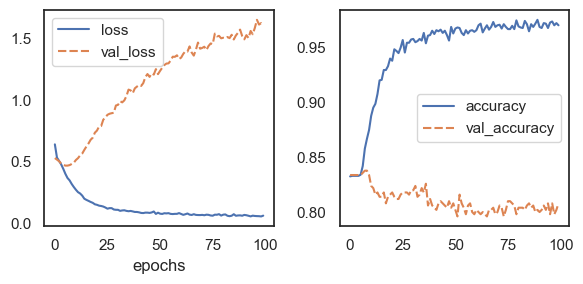

In [236]:
# plot the training and validation loss and accuracy
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(6, 3))

sns.lineplot(data=history_df[['loss', 'val_loss']], ax=ax0)
ax0.set_xlabel('epochs')
sns.lineplot(data=history_df[['accuracy', 'val_accuracy']], ax=ax1)
plt.tight_layout()


Does it look like the orange loss curve is going up? Then this model might be over-fitting!

In [237]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
f'test loss: {test_loss:.2f}, test accuracy {test_accuracy:.2f}'

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7825 - loss: 1.8512 


'test loss: 1.85, test accuracy 0.78'

In [238]:
y_pred = model.predict(X_test)
prediction = y_encoder.inverse_transform(y_pred)
ground_truth = y_encoder.inverse_transform(y_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [239]:
cm = confusion_matrix(ground_truth, prediction)
print(cm)

[[  1   0  14]
 [  0  16  43]
 [ 13  27 332]]


In [240]:
# To confirm which axis is the truth and which is the prediction
np.unique(ground_truth, return_counts=True)

(array(['Black', 'Cinnamon', 'Gray'], dtype=object), array([ 15,  59, 372]))

[Text(0.5, 22.749999999999986, 'prediction'),
 Text(4.749999999999998, 0.5, 'ground truth')]

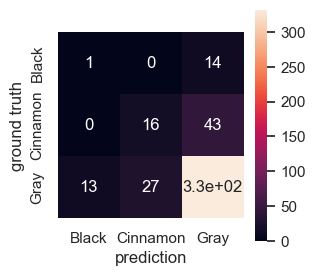

In [241]:
fig, ax = plt.subplots(figsize=(3, 3))
ax = sns.heatmap(cm, annot=True, square=True,
                 yticklabels=y_encoder.categories_[0],
                 xticklabels=y_encoder.categories_[0],
                 ax=ax
                 )
ax.set(xlabel='prediction', ylabel='ground truth')

<div style="border-left: 5px solid #0b84a5; padding: 0.5em; background: #44bcad80;">
  <b>⚠️ This model doesn't seem to work very well?</b>
  Let's find a baseline model!
</div>
Then we will at least know if something is going wrong during training; or if maybe the task is hard or there is no signal.

A first idea for a baseline model is.
> just predict the most frequent class all the time.

Let's try this:

In [242]:
# the distribution of the classes
np.unique(ground_truth, return_counts=True)

(array(['Black', 'Cinnamon', 'Gray'], dtype=object), array([ 15,  59, 372]))

Therefore, the model following that approach would be
> predict every squirrel is gray

We can build a model that acts this way, or just directly test how well that would work. Let's do that instead.

In [243]:
number_of_gray_squirrels = int(y_test[:, 2].sum())
number_of_gray_squirrels

372

In [244]:
number_of_all_squirrels = len(y_test)
number_of_all_squirrels

446

In [245]:
baseline_accuracy = number_of_gray_squirrels / number_of_all_squirrels
print(f'This baseline model would be correct for {100 * baseline_accuracy :.2f}% of the squirrels.\nCompare with our test accuracy of {test_accuracy * 100:.2f}%.')

This baseline model would be correct for 83.41% of the squirrels.
Compare with our test accuracy of 78.25%.


If we compare this `baseline_accuracy` with the `test_accuracy` from above, we see that the baseline model is actually better than the model we trained. 😵😅


## Extra Task: Predict `shift`
This means whether the squirrel was seen before or after noon.

In [ ]:
# Edit the function call above to predict `shift` instead, then re-run the cells above!
prepare_dataset(df, target='primary_fur_color')

## Extra Task: Feature Engineering
Build a feature that indicates whether a squirrel will accept and eat a nut from you:
It `approaches` or `forages`, or `eating` already. Also, it is not `indifferent` or `runs_from` you. Then build a predictor for this feature!

In [147]:
df['might_accept_snack'] = False
df.loc[((df.eating == True) | (df.foraging == True) | (df.approaches == True)) & (df.indifferent == False) & (df.runs_from == False), 'might_accept_snack'] = True
df.might_accept_snack.value_counts()

might_accept_snack
False    2503
True      520
Name: count, dtype: int64

In [173]:
# Now edit the function call above to predict this target instead, then re-run the cells above!
_ = prepare_dataset(df, target='might_accept_snack')

3023 rows remaining


You will see that this model seems to be doing a lot better, or at least not overfit. But again:

<div style="border-left: 5px solid #0b84a5; padding: 0.5em; background: #44bcad80;">
  <b>⚠️ Let's find a baseline model!</b>
</div>

In [197]:
share_of_feedable_squirrels = len(df.loc[df.might_accept_snack == True]) / len(df)
print(f'Predicting that no squirrel will accept a snack will be correct for {100 * (1 - share_of_feedable_squirrels) :.2f}% of the squirrels.\nCompare with our test accuracy of {test_accuracy * 100:.2f}%.')

Predicting that no squirrel will accept a snack will be correct for 82.80% of the squirrels.
Compare with our test accuracy of 100.00%.


Our model does great on this feature! But wait, we're using information that was already in the dataset; so it totally makes sense that it's possible for the feedforward neural network to learn that rule! 🙈😅

On the other hand, this is also an indication that there is really no signal for `primary_fur_color`, and just because a squirrel is black doesn't mean it's not active before noon or that they behave differently. (For example)

## Extra Task: Regression
Build a synthetic feature that encodes how chatty a squirrel is. For that, combine `kuks`, `moans` and `quaas`.

In [ ]:
# i'm skipping this 🤐